# Activity 2 - Stellar Structure Equations

In this tutorial, we will practice using python to calculate and graph the stellar structure equations and investigate the interiors of stars.

In [ ]:
# load our packages
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import astropy.units as u   # package converting between units!
%matplotlib inline

## Exercise 1

Read in the supplemental file for this lab ("Activity02_data.csv"), then use it to complete the following exercises.   

 (a) Write a Python function that returns the average mass density in g/cm$^{3}$ given a stellar mass and radius.  

In [ ]:
# Read in data
data = ascii.read('Activity02_data.csv')
data

index,Mass (solar masses),Radius (solar radii)
int64,float64,float64
0,120.0,16.0
1,60.0,10.0
2,25.0,6.5
3,12.0,4.3
4,5.0,2.7
5,2.5,1.8
6,1.25,1.2
7,1.0,0.9
8,0.8,0.7


In [ ]:
# Calculate average denisty

# option 1 - regular unit conversion
mass   = np.array(data['Mass (solar masses)'])
radius = np.array(data['Radius (solar radii)'])

mass_cgs = mass * 2e33      # g
radius_cgs = radius * 7e10  # cm

density_cgs = mass_cgs / (4/3 * np.pi * radius_cgs**3)    # cgs





# option 2 - using astropy units
#   the astropy.units subpackage to make unit conversions a lot easier!
mass = mass * u.Msun
radius = radius * u.Rsun
density = mass / (4/3 * np.pi * radius**3)
print(density)

density_cgs = density.to(u.g/u.cm**3)
print(density_cgs)




[6.99411371e-03 1.43239449e-02 2.17325821e-02 3.60319088e-02
 6.06443161e-02 1.02337283e-01 1.72694166e-01 3.27479307e-01
 5.56810297e-01 1.86509699e+00 5.96831037e+00 2.38732415e+01] solMass / solRad3
[4.13021433e-02 8.45867895e-02 1.28336807e-01 2.12778219e-01
 3.58121177e-01 6.04329486e-01 1.01980601e+00 1.93385435e+00
 3.28811621e+00 1.10139049e+01 3.52444956e+01 1.40977982e+02] g / cm3


 (b) Make a plot of $\rho_{avg}$ against the mass of the star in solar masses. Put a symbol at the sun’s location.  


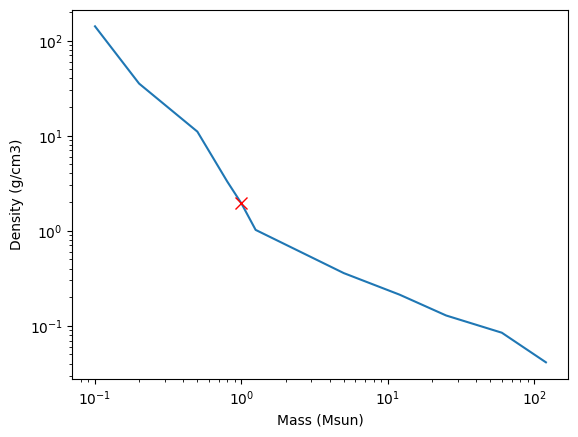

In [ ]:
# Plot of density vs mass
#   bonus - put both axes on a log scale

plt.plot(mass, density_cgs)
plt.plot(mass[7], density_cgs[7], marker='x', color='red', ms=8)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Mass (Msun)')
plt.ylabel('Density (g/cm3)')
plt.show()

(c) How do the average densities of low mass stars compare to high mass stars? Do you think their core densities would have the same trend?

Write your answer here:








---



## Exercise 2

Consider a star with a density profile given by: $$\rho = \rho_0 e^{−r/R}$$

Assume that the central density $\rho_0 = 100$ g/cm$^3$ and the total radius $R = 10^{10}$ cm. Use numerical integration (adding up thin shells) to find the total mass $M=m(R)$ in grams, then convert to solar masses.

In [ ]:
# define the star's properties
rho_0 = 100   # g/cm3
r_tot = 1e10  # cm

In [ ]:
# calculate total mass in cgs
nshells = 100         # number of shell layers
dr = r_tot / nshells  # thickness of each shell

# starting conditions
r = 0.0   # cm
m = 0.0   # g

# loop through all shells & keep a running total of mass
for i in range(0,nshells):
  r = i * dr                              # radius of this shell
  rho = rho_0 * np.exp(-1 * r / r_tot)    # density of this shell
  m = m + rho *  4 * np.pi * r**2 * dr    # mass interior + mass of this shell

print(m)  # cgs

1.9951182091661014e+32


In [ ]:
# convert to solar masses
m_solar = m / 2e33     #g
print(m_solar)

0.09975591045830508




---

## Final instructions
Finish any remaining exercises, then **email your notebook to me by the end of class on Sept 21** to get participation credit. Remember to add your name at the end of the filename.

\

If you're finishing the activity at home and run into python problems, don't worry about getting the code exactly right. This isn't a coding class and I'm not grading you on how well you know python. If you're stuck, add a text box and explain what you're trying to do *in words*. Then I'll know you have the right idea and know how to apply the content, even if the python code itself is not working.